# Homework 2: Regression and Classification
## Due Date: Thursday, June 22, 11:59PM

**Full Name**: *Your name here*

**Group members**: *list group-mate(s) here*

**IMPORTANT NOTE:** The homework needs to be submitted individually.

## Grading

Grading is broken down into autograded answers and free response.

For autograded answers, the results of your code are compared to provided and/or hidden tests. **For autograded probability questions, the provided tests will only check that your answer is within a reasonable range.**


### Please make sure to save regularly; do not rely on autosave to save your work for you!

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Regression

The Tips dataset contains information about various restaurant bills and the corresponding tips given by customers. It consists of the following columns:

* **total_bill**: The total amount of the bill, including the cost of the meal, taxes, and additional charges.
* **tip**: The amount of tip given by the customer.
* **sex**: The gender of the person paying the bill (Male or Female).
* **smoker**: Indicates whether the customer is a smoker (Yes or No).
* **day**: The day of the week when the bill was generated (e.g., Sun for Sunday, Sat for Saturday).
* **time**: The time of day when the bill was generated (Lunch or Dinner).
* **size**: The number of people in the dining party.

In [23]:
# let us first load the mpg dataset from the pkl file

# for those that work offline with the notebook you can use mpg directly from seaborn
# deactivate when working on jupyterhub
# tips = sns.load_dataset('tips')
# with open('tips.pkl', 'wb') as f:
#     pd.to_pickle(tips, f)

# please activate this when working on jupyterhub
with open('tips.pkl', 'rb') as f:
    tips = pd.read_pickle(f)


In [24]:
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

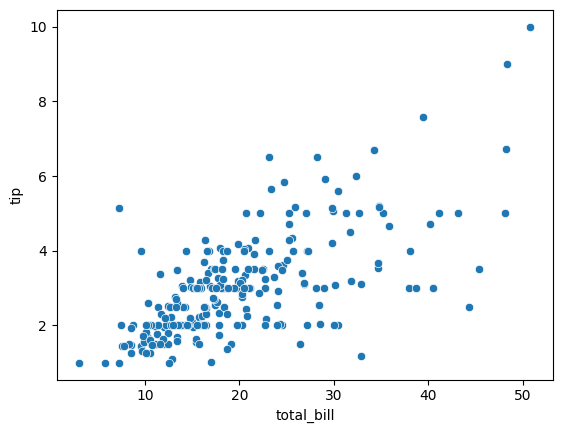

In [25]:

# Create a scatter plot of total_bill vs tip
sns.scatterplot(x="total_bill", y="tip", data=tips)


### Task 1a: Analyzing Tipping Behavior on Lunch and Dinner
To perform regression analysis on the given dataset, we need to convert the categorical columns ('sex', 'smoker', 'day') into numerical representations. Additionally, we can encode the day of the week column into binary variables for each day. Here's how you can prepare the columns for regression analysis:

* Convert the 'sex' column to numerical representation: Replace 'Male' with 0 and 'Female' with 1.
* Convert the 'smoker' column to numerical representation: Replace 'No' with 0 and 'Yes' with 1.
* Create new columns for each day of the week ['Thur', 'Fri', 'Sat', 'Sun'], that is in the dataset. Set the value to 1 if the 'day' matches the column's day, otherwise set it to 0.

In [26]:
# tips

In [27]:

# YOUR CODE HERE
# convert sex to numDataFrame.replace(to_replace=None, value=_NoDefault.no_default, *, inplace=False, limit=None, regex=False, method=_NoDefault.no_default)
tips['sex'] = tips['sex'].replace('Male', 0)
tips['sex'] = tips['sex'].replace('Female', 1)

#convert smoker
tips['smoker'] = tips['smoker'].replace('No', 0)
tips['smoker'] = tips['smoker'].replace('Yes', 1)

# day
days = ['Thur', 'Fri', 'Sat', 'Sun']

for day in days:
    tips[day] = (tips['day'] == day).astype(int)
    #tips['day'] = tips['day'].replace(days, 1)
tips.drop('day', axis=1, inplace=True)

In [28]:
tips

,total_bill,tip,sex,smoker,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,1,0,Dinner,2,0,0,0,1
1,10.34,1.66,0,0,Dinner,3,0,0,0,1
2,21.01,3.50,0,0,Dinner,3,0,0,0,1
3,23.68,3.31,0,0,Dinner,2,0,0,0,1
4,24.59,3.61,1,0,Dinner,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Dinner,3,0,0,1,0
240,27.18,2.00,1,1,Dinner,2,0,0,1,0
241,22.67,2.00,0,1,Dinner,2,0,0,1,0
242,17.82,1.75,0,0,Dinner,2,0,0,1,0


In [29]:
assert all(
    tips.columns == ['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'Thur', 'Fri', 'Sat',
                     'Sun'])


### Task 1b: Creating Group Averages:
To analyze the tipping behavior during lunch and dinner separately, calculate the average tip amount for each time period. and create the lunch_df and dinner_df subset dataframes. This mostly is a task to see that you did split the groups correctly.

In [37]:
# YOUR CODE HERE

#subset dataframes
lunch_ = tips.loc[tips['time'] == 'Lunch', ['time', 'tip']]
diner_ = tips.loc[tips['time'] == 'Dinner', ['time', 'tip']]
#print(lunch_)

# average
lunch_avg  = lunch_['tip'].mean()
dinner_avg = diner_['tip'].mean()

print('Average tip amount for lunch: ${:.2f}'.format(lunch_avg))
print('Average tip amount for dinner: ${:.2f}'.format(dinner_avg))

Average tip amount for lunch: $2.73
Average tip amount for dinner: $3.10


### Task 1c: Creating Two Separate Regressions:
To further analyze the tipping behavior during lunch and dinner, we can perform separate linear regression analyses to explore any potential relationships between tip amount and all explanatory variables for each time period respectively.

In [39]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)  # do not change this!

lunch_reg = LinearRegression()
dinner_reg = LinearRegression()

lunch_df = tips[tips['time'] == 'Lunch']
dinner_df = tips[tips['time'] == 'Dinner']

explanatory_columns = ['total_bill', 'sex', 'smoker', 'size', 'Thur', 'Fri', 'Sat', 'Sun'] # make this a list

# YOUR CODE HERE
lunch_reg.fit(lunch_df[explanatory_columns], lunch_df['tip'])
dinner_reg.fit(dinner_df[explanatory_columns], dinner_df['tip'])



LinearRegression()

In [40]:
assert len(explanatory_columns) == 8

In [ ]:
# Create a DataFrame of coefficients
coefficients_lunch = pd.DataFrame(
    {'Feature': explanatory_columns, 'Coefficient': lunch_reg.coef_.flatten()})
coefficients_dinner = pd.DataFrame(
    {'Feature': explanatory_columns, 'Coefficient': dinner_reg.coef_.flatten()})

print('Coefficients for lunch regression\n', coefficients_lunch)
print('\nCoefficients for dinner regression\n', coefficients_dinner)



### Interpreting coefficients. Given the following altered tables of coefficients answer the following questions:
Lunch

| Feature | Coefficient     |
|---------|-----------------|
| Fri     | 7.578246e-02    |
| Sat     | 1.526557e-16    |
| Sun     | 0.000000e+00    |
| Thur    | -7.578246e-02   |
| sex     | -1.278410e-01   |
| size    | 2.134928e-01    |
| smoker  | 1.349292e-01    |
| total_bill | 1.054946e-01 |


Dinner

| Feature | Coefficient     |
|---------|-----------------|
| Fri     | 0.038579        |
| Sat     | -0.067515       |
| Sun     | 0.026320        |
| Thur    | 0.002615        |
| sex     | 0.117686        |
| size    | 0.144462        |
| smoker  | -0.177808       |
| total_bill | 0.092791    |






### Task 1d: multiple choice: Which of the following statements is true? Indicate all that apply as a string in the list below.
i.e. choosing A & B would be ['A', 'B']


A) The tip amount in Euros (€) decreases by approximately €1.054946 for each Euro increase in the total bill during lunch, and by approximately €0.092791 during dinner, all else being equal.

B) The tip amount in Euros (€) remains constant regardless of the total bill amount during both lunch and dinner.

C) The tip amount in Euros (€) increases by approximately €1.054946 for each Euro increase in the total bill 
during lunch, and by approximately €0.092791 during dinner, all else being equal.

D) The tip amount in Euros (€) is unrelated to the total bill amount during both lunch and dinner.

In [ ]:
# answer_d1 = []
# YOUR CODE HERE
raise NotImplementedError

### Task 1e: multiple choice: Which of the following statements is true? Indicate all that apply as a string in the list below.

A) Being male is associated with a decrease of approximately €0.13 in the tip amount during lunch, compared to being female, all else being equal.

B) Being male is associated with an increase of approximately €0.13 in the tip amount during lunch, compared to being female, all else being equal.

C) The 'sex' variable has no effect on the tip amount during lunch.

D) Being male is associated with a decrease of approximately €0.12 in the tip amount during dinner, compared to being female, all else being equal.

E) The 'sex' variable has no significant effect on the tip amount during dinner.



In [ ]:
# consider the ecoding of the sex variable!
# answer_d2 = []
# YOUR CODE HERE
raise NotImplementedError

# Part 2: Overview Learning

### Task 2: Choose the right learning paradigm
Now, your task is to identify the learning paradigm that best fits each scenario. Write the letter(s) of the description(s) into the corresponding paradigm list:
(Supervised Learning - Regression, Supervised Learning - Classification, Unsupervised Learning - Clustering, Semi-Supervised Learning, Self-Supervised Learning, or Reinforcement Learning)

A) Predicting the stock price of a company based on historical market data.

B) Grouping customers based on their purchasing behavior without any prior knowledge of customer segments.

C) Teaching a chatbot to classify customer inquiries into different categories based on the text content, based on a dataset of human labeled examples.

D) Analyzing customer feedback to identify common themes and patterns without any predefined categories.

E) Training a model to predict the sentiment (positive, negative, neutral) of movie reviews based on the text.

F) Discovering hidden topics in a large collection of research papers without any prior knowledge of the subjects.

G) Fine-tuning a pretrained image recognition model on a dataset of specific objects to improve its accuracy in recognizing those objects.

H) Training a model to label untagged images using a small set of labeled images.

I) Teaching a self-driving car to navigate through a city by rewarding it for reaching its destination
efficiently.

J) Pretraining a language model on a corpus of text to generate meaningful text outputs.


In [ ]:
# supervised = []
# unsupervised = []
# semi_supervised = []
# self_supervised = []
# reinforcement = []

# YOUR CODE HERE
raise NotImplementedError

In [ ]:
# you have sorted all examples into the lists
assert set.union(set(supervised), set(unsupervised), set(semi_supervised), set(self_supervised),
                 set(reinforcement)) == set(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])



# Part 3 Classification

# Decision Trees and Random Forests

In this assignment, we will have you train a multi-class classifier with two different models (decision tree, random forest) and compare the accuracies and decision boundaries created by each. We'll be looking at a dataset of per-game stats for all NBA players in the 2018-19 season. This dataset comes from [basketball-reference.com](https://www.basketball-reference.com/).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [ ]:
nba_data = pd.read_csv("nba18-19.csv")
nba_data.head(5)

Our goal will be to predict a player's position given several other features. The 5 positions in basketball are PG, SG, SF, PF, and C (which stand for point guard, shooting guard, small forward, power forward, and center). This information is contained in the `Pos` column.

In [ ]:
nba_data['Pos'].value_counts()

While we could set out to try and perform 5-class classification, the results (and visualizations) are slightly more interesting if we try and categorize players into 1 of 3 categories: **guard**, **forward**, and **center**. The below code will take the `Pos` column of our dataframe and use it to create a new column `Pos3` that consist of values G, F, and C (which stand for guard, forward, and center).

In [ ]:
def basic_position(pos):
    if 'F' in pos:
        return 'F'
    elif 'G' in pos:
        return 'G'
    return 'C'


nba_data['Pos3'] = nba_data['Pos'].apply(basic_position)
nba_data['Pos3'].value_counts()

Furthermore, since there are **many** players in the NBA (in the 2018-19 season there were 530 unique players), our visualizations can get noisy and messy. Let's restrict our data to only contain rows for players that averaged 10 or more points per game.

In [ ]:
nba_data = nba_data[nba_data['PTS'] > 10]

Now, let's look at a scatterplot of Rebounds (`TRB`) vs. Assists (`AST`).

In [ ]:
sns.scatterplot(data=nba_data, x='AST', y='TRB', hue='Pos3')

As you can see, when using just rebounds and assists as our features, we see pretty decent cluster separation. That is, Centers, Forwards, and Guards appear in different regions of the plot.

## Evaluating Split Quality

We will explore different ways to evaluate split quality for classification and regression trees in this question.

### Task 3a: Entropy

In lecture we defined the entropy S of a node as:

$$ S = -\sum_{C} p_C \log_{2} p_C $$

where $p_C$ is the proportion of data points in a node with label $C$. This function helped us determine the unpredictability of a node in a decision tree.

Implement the `entropy` function, which outputs the entropy of a node with a given set of labels. The `labels` parameter is a list of labels in our dataset. For example, `labels` could be `['G', 'G', 'F', 'F', 'C', 'C']`.



In [ ]:
def entropy(labels):
    # notice that this 
    # YOUR CODE HERE
    raise NotImplementedError


entropy(nba_data['Pos3'])

### Task 3b: Weighted Entropy

In the lecture, we used weighted entropy as a loss function to help us determine the best split. Recall that the weighted entropy is given by:

$$ L = \frac{N_1 S(X) + N_2 S(Y)}{N_1 + N_2} $$

$N_1$ is the number of samples in the left node $X$, and $N_2$ is the number of samples in the right node $Y$. This notion of a weighted average can be extended to other metrics such as Gini impurity and variance simply by changing the $S$ (entropy) function to $G$ (Gini impurity) or $\sigma^2$ (variance), but we won't go into detail here (just a pointer that there are other means of evaluating a split).

First, implement the `weighted_metric` function. The `left` parameter is a list of labels or values in the left node $X$, and the `right` parameter is a list of labels or values in the right node $Y$. The `metric` parameter is a function which can be `entropy`. You may assume that `left` and `right` contain discrete labels.

Then, assign `we_pos3_age_30` to the weighted entropy (in the `Pos3` column) of a split that partitions `nba_data` into two groups: a group with players who are 30 years old or older and a group with players who are younger than 30 years old.


In [ ]:
def weighted_metric(left, right, metric):
    # YOUR CODE HERE
    raise NotImplementedError


# proposed split: age > 30
# YOUR CODE HERE
raise NotImplementedError

we_pos3_age_30 = weighted_metric(left, right, entropy)
we_pos3_age_30

We will not go over the entire decision tree fitting process in this assignment, but you now have the basic metric to fit a decision tree.

## Decision Tree Classifier

Let's now create a decision tree classifier on the `nba_train` data, and look at the resulting decision boundary.

In the following cell, first, use [`tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model using the same features and response as above, and call this model `decision_tree_model`. Set the `random_state` parameter to 42. Set the criterion to be `entropy`.

**Hint:** Your code will be mostly the same as the previous part.



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

nba_train, nba_test = train_test_split(nba_data, test_size=0.25, random_state=100)
nba_train = nba_train.sort_values(by='Pos')
nba_test = nba_test.sort_values(by='Pos')


In [ ]:

# Then, fit that model using the AST and TRB columns (in that order) from nba_train as our features, and Pos3 as our response variable
decision_tree_model = DecisionTreeClassifier(random_state=42, criterion='entropy')
X, y = nba_train[['AST', 'TRB']], nba_train['Pos3']
decision_tree_model.fit(X, y)
;

### Task 3c: Model Quality (inspection)

Just because sklearn already provides a function to plot the tree, let us have a look at it.

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
plot_tree(decision_tree_model, filled=True, feature_names=['AST', 'TRB'],
          class_names=['C', 'F', 'G'], ax=ax)

The following function will help us visualize the decision boundary of our classifier. You don't need to understand how it works, but you can read the code if you're curious.

In [ ]:
from matplotlib.colors import ListedColormap


def decision_boundary(model, data, label):
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
    xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
    Z_string = model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    sns.scatterplot(data=data, x='AST', y='TRB', hue='Pos3')
    plt.title(label);


Now, let's draw the decision boundary for this decision tree classifier, and see how the classifier performs on both the training and test data.

In [ ]:
decision_boundary(decision_tree_model, nba_train, 'Training Set, Decision Tree ')

In [ ]:
decision_boundary(decision_tree_model, nba_test, 'Test Set, Decision Tree ')

### Given the three plots, answer the following multiple choice questions, indicating which answer(s) are correct.:

What does an overfitting decision tree model indicate?

A) The model is too simple and underutilizes the available data.

B) The model is complex and captures the noise or random fluctuations in the training data.

C) The model is perfectly balanced and accurately generalizes to unseen data.

D) The model is unable to learn from the training data and performs poorly.

### Which of the following statements is true about an overfitting decision tree model?

E) It tends to have low variance and high bias.

F) It shows poor performance on both the training and test datasets.

G) It indicates the model is too simple and needs more complexity.

H) It captures the underlying patterns and relationships in the data accurately.

### How does increasing the complexity of a tree eventually affect its decision boundary, compared to a slightly simpler model?

I) The decision boundary becomes more flexible and better captures the underlying patterns.

J) The decision boundary becomes more rigid and underfits the training data.

K) The decision boundary becomes overly complex and closely follows the training data points.

L) The decision boundary remains unchanged and doesn't adapt to the training data.

### What is a common technique to reduce overfitting in a decision tree model?

M) Increasing the maximum depth of the decision tree.

N) Training the model on a smaller dataset to avoid noise.

O) Decreasing the regularization parameter to encourage more splits.

P) Pruning the decision tree by setting constraints on the tree growth.


### Which of the following evaluation results would indicate an overfitting decision tree model?

Q) High training accuracy and low test accuracy.

R) High training accuracy and high test accuracy.

S) Low training accuracy and low test accuracy.

T) Low training accuracy and high test accuracy.



In [ ]:
# correct_solutions = []
# YOUR CODE HERE
raise NotImplementedError


### Task 3d: Evaluate Decision Tree Classifier
For a given model write a function, that returns it's train and test accuracy. Use the function `evaluate_classifier` to evaluate the decision tree model on the training and test sets. Assign the training accuracy to `dt_training_accuracy` and the test accuracy to `dt_test_accuracy`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def evaluate_classifier(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the quality of a classifier by calculating the accuracy score on both the training and test datasets.

    Args:
    - model: The trained classifier model.
    - X_train: The feature matrix of the training dataset.
    - y_train: The true labels of the training dataset.
    - X_test: The feature matrix of the test dataset.
    - y_test: The true labels of the test dataset.

    Returns:
    - train_accuracy: The accuracy score on the training dataset.
    - test_accuracy: The accuracy score on the test dataset.
    """
    # YOUR CODE HERE
    raise NotImplementedError
    return train_accuracy, test_accuracy


# Original model accuracy
dt_training_accuracy, dt_test_accuracy = evaluate_classifier(
     decision_tree_model,
     nba_train[['AST', 'TRB']],
     nba_train['Pos3'],
     nba_test[['AST', 'TRB']],
     nba_test['Pos3']
)
print(f"Training Accuracy: {dt_training_accuracy:.4f},\nTest Accuracy: {dt_test_accuracy:.4f}")


### Task 3e: Improving the decision tree model.
Given your knowledge on decision trees, can you improve the model? Your model's performance will be evaluated on the test set (obviously) and compared against the previous model. You can either explicitly loop over relevant parameters or consult GridSearchCV (which is more advanced, using cross validation that we will encounter later in the course, but for all intents and purposes here does a grid search - i.e. an enumeration of all possible combination of parameters) from sklearn.model_selection. Notice, that GridSearchCV per default assumes, that the model has a score method if not otherwise provided -which the sklearn [DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) indeed has, measuring accuracy. 

Assign the training accuracy to dt_training_accuracy1 and the test accuracy to dt_test_accuracy1. A test accuracy of 0.60 is the threshold here.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# YOUR CODE HERE
raise NotImplementedError

# Evaluate the best model on the test set
dt_test_accuracy1 = best_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])

print("Best Parameters:", best_params)
print("Test Accuracy with Best Model:", dt_test_accuracy1)


For your own convenience, here again the plot and the decision boundary of your best model.

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
plot_tree(best_model, filled=True, feature_names=['AST', 'TRB'], class_names=['C', 'F', 'G'], ax=ax)

In [ ]:
decision_boundary(best_model, nba_test, 'Test Set, Decision Tree ')

In [ ]:
assert isinstance(best_model, DecisionTreeClassifier)


### Task 3f: Classify by hand.

given the tree below, classify the observation TRB (Total Rebounds) = 4.5, AST (Assists) = 2.0. Indicate the integer that corresponds to the leaf node that the observation falls into (counting from left to right).

![decision tree](tree.png)

In [ ]:

# bucket =
# YOUR CODE HERE
raise NotImplementedError

In [ ]:
assert isinstance(bucket, int)

## Random Forests


As a reminder from the lecture: Fully-grown decision trees will almost always overfit data

▶ In other words, small changes in dataset will result in very different decision tree

▶ Idea: Build many decision trees and have them vote

Given the issues we experienced in the former task and these statements, you will probably agree, that we should search for a more robust solution, that generalizes well.

So what we do is, we create multiple decision trees from the same data by

1) bagging, i.e. bootstrapping the data

2) allow only a random subset of features for each splitting decision.

This allows us to create variance across decision trees and therefore reduce overfitting and model variance.
The final prediction is the majority vote of the decision trees.


Let's now create a random forest classifier on the same training data `nba_train` and look at the resulting decision boundary.

In the following cell, use [`ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to fit a model using the same features and response as above, and call this model `random_forest_model`. Use 20 trees in your random forest classifier, and set the `random_state` parameter to 42.

**Hint:** Your code for both parts will be mostly the same as the first few parts of this question.

**Hint:** Look at the `n_estimators` parameter of `ensemble.RandomForestClassifier`.

In [ ]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
X, y = nba_train[['AST', 'TRB']], nba_train['Pos3']
random_forest_model.fit(X, y)

Now, let's draw the decision boundary for this random forest classifier, and see how the classifier performs on both the training and test data.

In [ ]:
decision_boundary(random_forest_model, nba_train, 'Training Set, Random Forest ')

In [ ]:
decision_boundary(random_forest_model, nba_test, 'Test Set, Random Forest ')

We compute the training and test accuracies of the random forest model below.

In [ ]:
rf_train_accuracy = random_forest_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
rf_test_accuracy = random_forest_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])
rf_train_accuracy, rf_test_accuracy

### Task 3g: A simplified Random Forest.

Consider the following code snippet, which of the features that are used in random forests is displayed here (simplistically)?


A) Ensemble Learning: Random forests utilize ensemble learning, which involves combining the predictions of multiple individual decision trees to make the final prediction. The ensemble of decision trees allows for improved prediction accuracy and robustness.

B) Bagging (Bootstrap Aggregating): Bagging is a technique used in random forests to create multiple subsets of the training data. Each subset is created through bootstrapping, which involves sampling the data with replacement. Bagging helps introduce diversity in the training process, as each decision tree is trained on a different subset of the data.

C) Random Feature Subsampling: Random forests further enhance diversity by randomly selecting a subset of features at each splitting decision. This process, known as random feature subsampling, ensures that each decision tree is trained on a different subset of features. By reducing the correlation between trees, random feature subsampling helps prevent overfitting and improve generalization.

D) Majority Voting: In the prediction phase, random forests combine the predictions of individual decision trees using majority voting. Each decision tree casts a vote for the predicted class, and the class with the majority of votes is chosen as the final prediction. Majority voting helps improve the accuracy and robustness of the ensemble model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from collections import Counter

class SimpleForestClassifier:
    def __init__(self, num_trees=10, max_depth=5, random_state=None):
        self.num_trees = num_trees
        self.random_state = random_state
        self.decision_trees = []
        self.depths = np.random.randint(1, max_depth, size=num_trees)

    def fit(self, X, y):
        np.random.seed(self.random_state)

        for _, depth in zip(range(self.num_trees), self.depths):
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sub = X.iloc[indices]
            y_sub = y.iloc[indices]

            decision_tree = DecisionTreeClassifier(random_state=self.random_state, max_depth=depth)
            decision_tree.fit(X_sub, y_sub)

            self.decision_trees.append(decision_tree)

    def predict(self, X):
        predictions = []

        for decision_tree in self.decision_trees:
            predictions.append(decision_tree.predict(X))

        return self.select(predictions)

    def select(self,predictions):
        """
        very naive way of selecting a single prediction from a list of predictiosn
        :param predictions: a list of arrays, looking similar to this:
            [np.array(['F', 'F', 'F', 'C', 'C', 'F', 'F', 'C', 'C', 'F', 'C', 'C', 'F',
                      'C', 'F', 'F', 'C', 'C', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G',
                      'G', 'G', 'G', 'G', 'F', 'G', 'G', 'G', 'F', 'F', 'F', 'G', 'F',
                      'F', 'F', 'C', 'G', 'G', 'G', 'F', 'G', 'G', 'G', 'F', 'G', 'F',
                      'G', 'G', 'F', 'F'], dtype=object),
               np.array(['C', 'C', 'F', 'C', 'C', 'C', 'F', 'C', 'F', 'G', 'C', 'C', 'C',
                      'C', 'F', 'F', 'C', 'C', 'C', 'F', 'F', 'G', 'F', 'G', 'G', 'G',
                      'G', 'G', 'G', 'G', 'F', 'G', 'F', 'G', 'F', 'F', 'F', 'G', 'F',
                      'C', 'F', 'C', 'G', 'F', 'G', 'F', 'G', 'F', 'G', 'G', 'G', 'F',
                      'G', 'G', 'F', 'F'], dtype=object)]

        :return: np.array
        """
        # Transpose the predictions array
        transposed_predictions = np.array(predictions).T

        ensemble_predictions = []
        for preds in transposed_predictions:


            # Count the occurrences of each predicted value
            counter = Counter(preds)
            most_common = counter.most_common()

            ensemble_predictions.append(most_common[0][0])

        return np.array(ensemble_predictions)




In [ ]:

# Create an instance of RandomForestClassifier
simple_forest = SimpleForestClassifier(num_trees=2, random_state=42)

# Fit the random forest model on the training data
X_train, y_train = nba_train[['AST', 'TRB']].reset_index(drop=True), nba_train['Pos3'].reset_index(
    drop=True)
X_test, y_test = nba_test[['AST', 'TRB']].reset_index(drop=True), nba_test['Pos3'].reset_index(
    drop=True)
simple_forest.fit(X_train, y_train)

# Make predictions using the random forest model
predictions = simple_forest.predict(X_test)

print(predictions)

In [ ]:
# rf_features = []
# YOUR CODE HERE
raise NotImplementedError

In [ ]:
assert isinstance(rf_features, list)
set(rf_features).issubset(set(['A', 'B', 'C', 'D']))